# **Ridge Regression**

### **Definisi**

Regresi Ridge adalah varian dari regresi linear yang menambahkan penalti

L2 untuk koefisien model, yang berguna untuk menghindari overfitting.

### **Cara Kerja**

 Menambahkan penalti pada besarnya koefisien untuk mengurangi kompleksitas model.

$\min_{\beta_0, \beta_1, \dots, \beta_n} \sum_{i=1}^m (y_i - \hat{y}_i)^2 + \lambda \sum_{j=1}^n \beta_j^2$

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

warnings.filterwarnings("ignore")

In [2]:
# import Dataset
from sklearn.datasets import make_regression

X, y = make_regression(n_samples=500, n_features=5, noise=50, bias=120, random_state=42)

X.shape, y.shape

((500, 5), (500,))

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [4]:
# split data test and train
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)


X_train.shape, X_test.shape, y_train.shape, y_test.shape

((350, 5), (150, 5), (350,), (150,))

In [5]:
# Standarisation Data (X) train and test
SK = StandardScaler()

X_train = SK.fit_transform(X_train, y_train)

X_test = SK.transform(X_test)

In [6]:
from sklearn.linear_model import Ridge

In [7]:
# init instance of Model
RR = Ridge()

# train Data features (X) with Linear Regression Model
RR.fit(X_train, y_train)

print(RR.get_params())

{'alpha': 1.0, 'copy_X': True, 'fit_intercept': True, 'max_iter': None, 'positive': False, 'random_state': None, 'solver': 'auto', 'tol': 0.0001}


In [8]:
# predict and evalutaion
from sklearn.metrics import mean_squared_error, mean_absolute_error

y_pred = RR.predict(X_test)

# evaluate
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")

Mean Squared Error: 2585.725388785818
Mean Absolute Error: 41.256659373032875


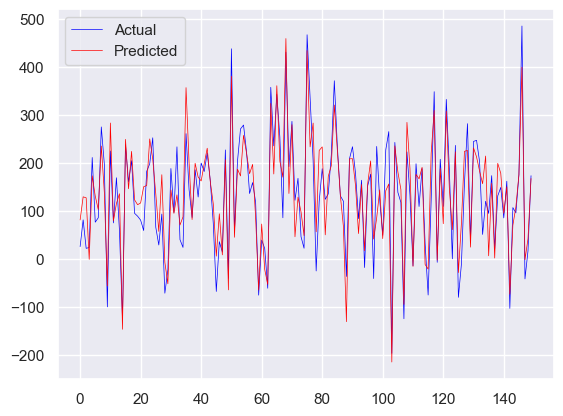

In [9]:
# ploting data
sns.set()

plt.plot(range(len(y_test)), y_test, label="Actual", color="Blue", linewidth=0.5)
plt.plot(range(len(y_pred)), y_pred, label="Predicted", color="Red", linewidth=0.5)
plt.legend()

plt.show()